___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# check for null values in the dataframe 
df.isnull().sum()

age 0
sex 0
cp 0
trestbps 0
chol 0
fbs 0
restecg 0
thalach 0
exang 0
oldpeak 0
slope 0
ca 0
thal 0
target 0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

<Axes: xlabel='target', ylabel='count'>

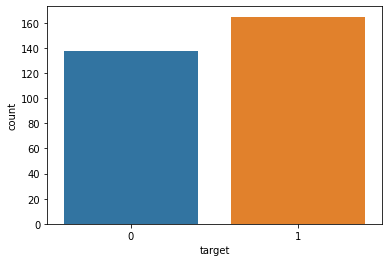

In [9]:
#Always do these countplots in logistic regression to find out if the data is not imalanced.
sns.countplot(data=df, x=df['target'])

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

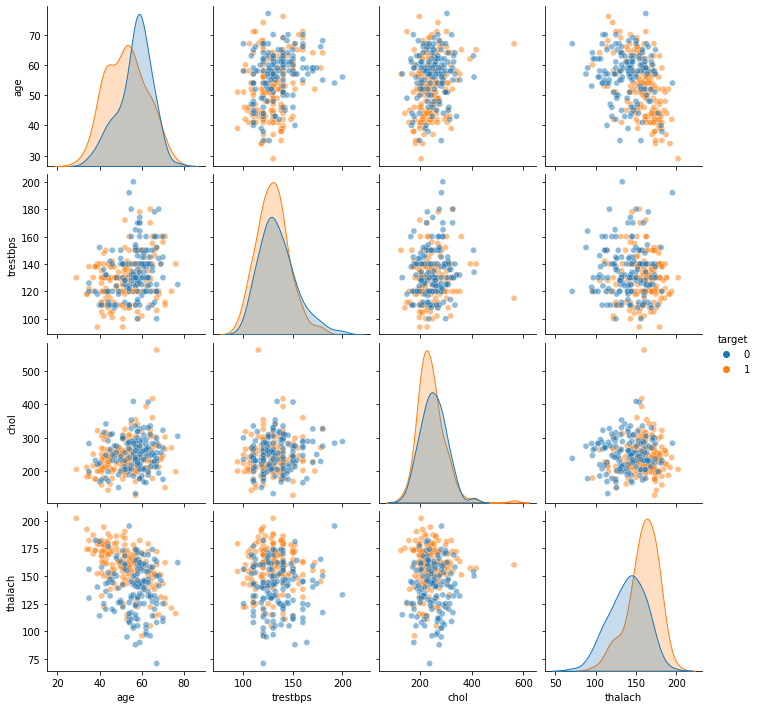

In [10]:
#Choose only few features, not all of them, otherwise the pairplot is too big
df_for_pairplot = df[['age', 'trestbps', 'chol', 'thalach', 'target']]
sns.pairplot(data=df_for_pairplot, hue='target', kind='scatter', plot_kws={'alpha':0.5})

**TASK: Create a heatmap that displays the correlation between all the columns.**

<Axes: >

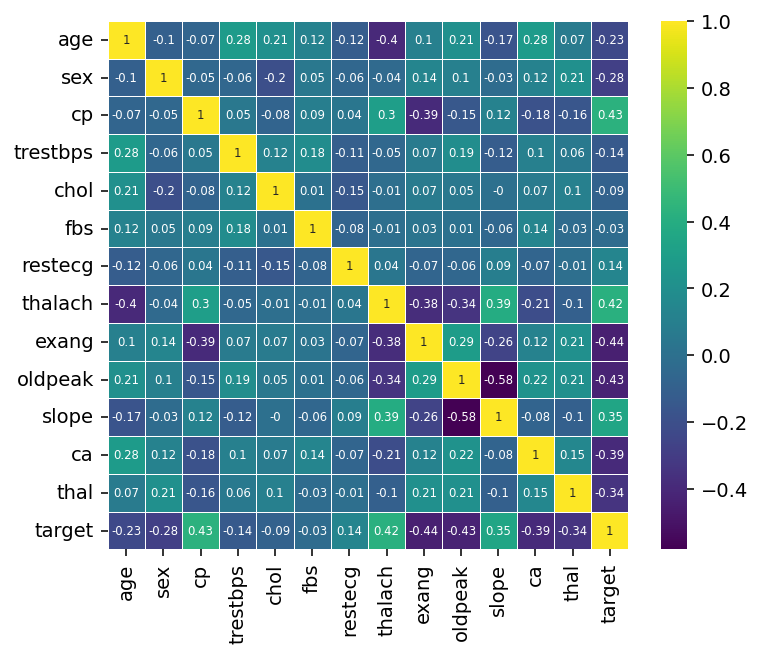

In [11]:
plt.figure(figsize=(6,5), dpi=140) 
sns.heatmap(data=round(df.corr(),2), annot=True, cmap='viridis', linewidth=.5, annot_kws={"size": 6})
#annot_kws changes the size of the numbers inside the heatmap

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [12]:
# CODE HERE
X = df.drop('target', axis=1)
y = df['target']

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [14]:
# CODE HERE
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [15]:
# add penalty to logistic regression, set l1, l2 and elasticnet 
# Define parameters for grid search
#Remember C should be in logarithmic scale ranging from 0 to 10
params = {"penalty": ["l1", "l2", "elasticnet"], 
          "C": np.logspace(0,10,20),
          "l1_ratio": np.linspace(0,1,10)}

# Create a logistic regression model
logistic_model = LogisticRegression(solver='saga', max_iter=10000, random_state=101)

# Implement grid search
grid = GridSearchCV(logistic_model, params, cv=5, scoring='accuracy')
#Here I can change different scoring metrics, for balanced classes accuracy is ok, otherwise use precision or recall
grid.fit(X_train_scaled, y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warni

GridSearchCV(cv=5,
 estimator=LogisticRegression(max_iter=10000, random_state=101,
 solver='saga'),
 param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
 1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
 1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
 2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
 2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
 'l1_ratio': array([0. , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
 0.55555556, 0.66666667, 0.77777778, 0.88888889, 1. ]),
 'penalty': ['l1', 'l2', 'elasticnet']},
 scoring='accuracy') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GridSearchCV GridSearchCV(cv=5,
 estimator=LogisticRegression(max_iter=10000, random_state=101,
 solver='saga'),
 param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
 1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
 1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
 2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
 2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
 'l1_ratio': array([0. , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
 0.55555556, 0.66666667, 0.77777778, 0.88888889, 1. ]),
 'penalty': ['l1', 'l2', 'elasticnet']},
 scoring='accuracy') estimator: LogisticRegression LogisticRegression(max_iter=10000, random_state=101, solver='saga') LogisticRegression LogisticRegression(max_iter=10000, random_state=101, solver='saga')

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [16]:
grid.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

### Coeffecients

**TASK: Report back the model's coefficients.**

In [17]:
# Fetching the best estimator from GridSearchCV
best_estimator = grid.best_estimator_
# Fetching the coefficients
coefficients = best_estimator.coef_
coefficients

array([[-0.04784945, -0.6965283 , 0.88803298, -0.23903805, -0.18647307,
 0.00236996, 0.09602278, 0.42195732, -0.40859231, -0.52440346,
 0.35779948, -0.83239328, -0.56451916]])

**BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.**

In [18]:
# Getting column names from the original DataFrame
column_names = df.drop('target', axis=1).columns

# Adding column names to df_best_coef
df_best_coef = pd.DataFrame(coefficients, columns=column_names).transpose()

# Renaming the only column of df_best_coef to 'Coefficients'
df_best_coef = df_best_coef.rename(columns={0: 'Coefficients'})

df_best_coef

,Coefficients
age,-0.047849
sex,-0.696528
cp,0.888033
trestbps,-0.239038
chol,-0.186473
fbs,0.002370
restecg,0.096023
thalach,0.421957
exang,-0.408592
oldpeak,-0.524403


<Axes: ylabel='Coefficients'>

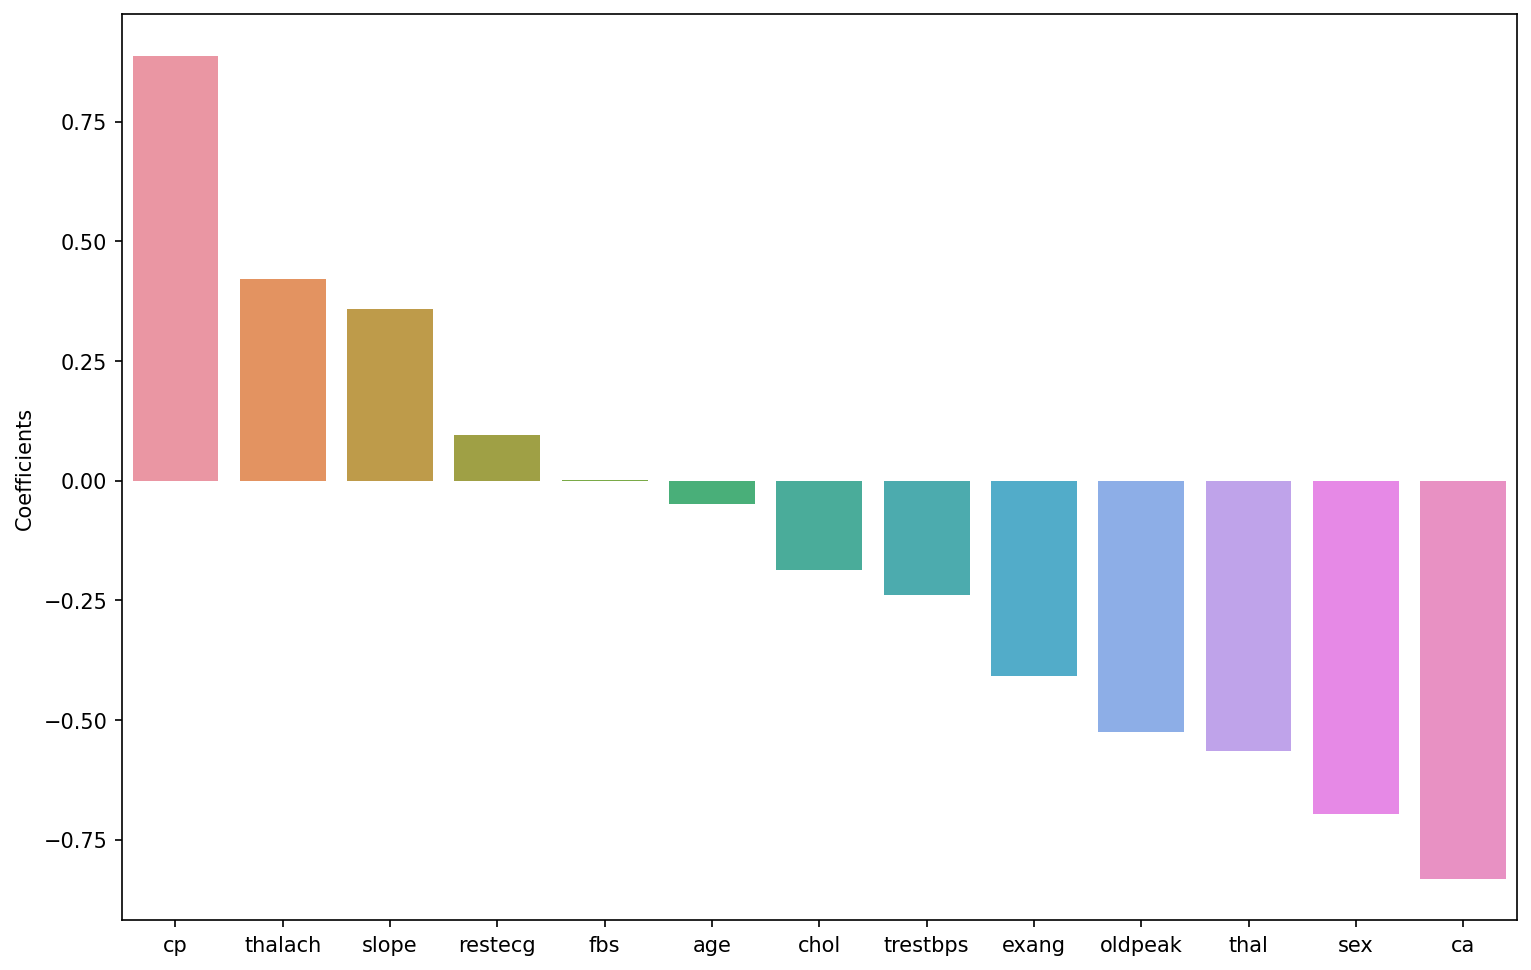

In [19]:
df_best_coef = df_best_coef.sort_values(by='Coefficients', ascending=False)

plt.figure(figsize=(12,8), dpi=150)
sns.barplot(data=df_best_coef, x=df_best_coef.index, y='Coefficients')

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [20]:
y_predicted = grid.predict(X_test_scaled)
y_predicted

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [21]:
f'The accuracy score is {round(accuracy_score(y_test, y_predicted),2)}'

'The accuracy score is 0.84'

In [24]:
confusion_matrix(y_test, y_predicted)

array([[12, 3],
 [ 2, 14]])

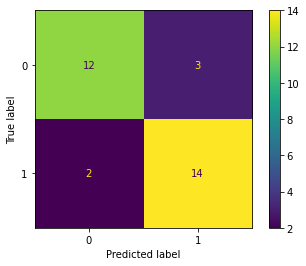

In [521]:
ConfusionMatrixDisplay.from_estimator(grid, X_test_scaled, y_test)

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [522]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [523]:
# Predicting the probabilities of the True class
y_predicted_probabilities = grid.predict_proba(X_test_scaled)[:, 1]
# This line of code uses a trained classification model (grid) to predict the probabilities of the positive class (usually labeled as True or 1) for the test data (X_test). The predict_proba function returns the predicted probabilities for each class. Since this is a binary classification task, the output is a matrix where the first column represents the probabilities of the negative class and the second column represents the probabilities of the positive class. The [:, 1] indexing is used to extract only the predicted probabilities of the positive class.

# Calculating and printing the AUC score
auc_score = roc_auc_score(y_test, y_predicted_probabilities)
#Here, the AUC score is calculated using the roc_auc_score function. AUC stands for "Area Under the Curve," and it quantifies the overall performance of a binary classification model by measuring the area under the ROC curve. The ROC curve is a graphical representation that shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity) as the classification threshold changes.
print(f'AUC Score: {round(auc_score,2)}, which is the same as in the chart below.')

AUC Score: 0.95, which is the same as in the chart below.


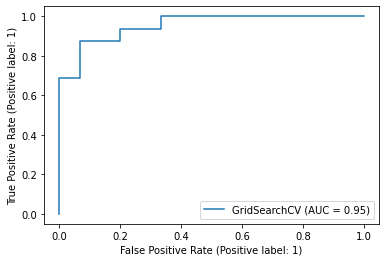

In [524]:
RocCurveDisplay.from_estimator(grid, X_test_scaled, y_test)
plt.show()

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

#Now I Should retrain the whole model on all of the data

In [525]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [527]:
# EXPECTED PREDICTION
grid.predict(patient)

array([0])

In [528]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)
grid.predict_proba(patient)

array([[1.00000000e+00, 1.31280383e-18]])

----

## Great Job!